In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
url = 'https://github.com/ClasherGeek77/ml-csv/raw/main/house_train.csv'
df_train = pd.read_csv(url)
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


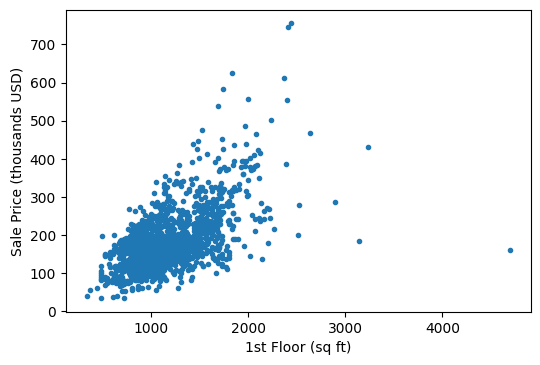

In [ ]:
var = '1stFlrSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
#data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

plt.figure(dpi=100)
plt.plot(data['1stFlrSF'], np.divide(data['SalePrice'], 1000), '.')
plt.xlabel('1st Floor (sq ft)')
plt.ylabel('Sale Price (thousands USD)')
plt.savefig("house_price_1stFlrSF.png")

In [ ]:
x_train = data['1stFlrSF']
y_train = data['SalePrice']

print (x_train.shape, y_train.shape)

(1460,) (1460,)


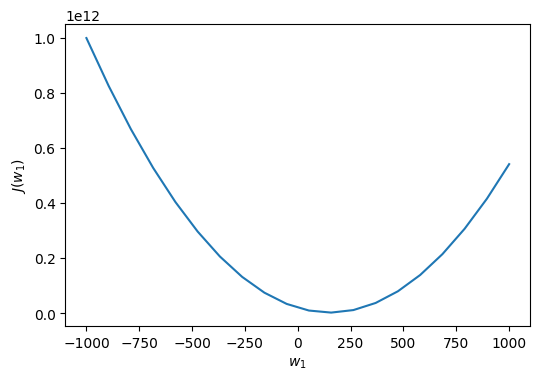

In [ ]:
clf = lambda x, w: w * x

def cost(x, w, y_tru):
    sums = 0
    for i, xp in enumerate(x):
        p = clf(xp, w) - y_tru[i]
        sums = sums + (p * p)
    return (sums / (2 * len(x)))

w = np.linspace(-1000, 1000, 20)
J_w = []
for wp in w:
    J_w.append(cost(x_train, wp, y_train))
    
plt.figure(dpi=100)
plt.plot(w, J_w, '-')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$J(w_1)$')
plt.savefig('w1_cost_junction.png')

In [ ]:
clf = lambda x, w: np.dot(w, x)
def cost(x, w, y_tru):
    sums = 0
    for i, xp in enumerate(x):
        p = clf([1, xp], w) - y_tru[i]
        sums = sums + (p * p)
    return (sums / (2 * len(x)))

# gradient descent
w = [1000, 1000]
alpha = 0.000001
it = 0
n_iter = 2000
N = float(len(x_train))

w0 = []
w1 = []
costs = []
while (it < n_iter):
    it += 1
    # calculating partial differential
    dw0 = 0
    dw1 = 0
    for i, x in enumerate(x_train):
        res = clf([1, x], w) - y_train[i]
        dw0 += res / N
        dw1 += res / N * x
    # update parameter simultaneously
    t0 = w[0] - alpha * dw0
    t1 = w[1] - alpha * dw1
    w = [t0, t1]
    w0.append(w[0])
    w1.append(w[1])
    costs.append(cost(x_train, w, y_train))

In [ ]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import itertools

kx = np.linspace(500, 1500, 100)
ky = np.linspace(50, 1500, 100)
kz = []
for prod in itertools.product(kx, ky):
    kz.append(cost(x_train, prod, y_train))
assert len(kz) == (len(kx) * len(ky))
kz = np.array(kz)
kz = kz.reshape((len(kx), len(ky)))

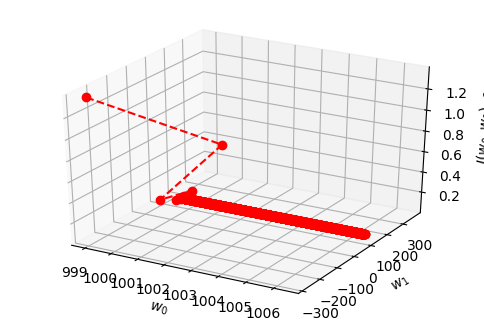

In [ ]:
fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')
cset = ax.plot(w0, w1, costs, 'ro--')
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel(r'$J(w_0, w_1)$')
ax.xaxis._axinfo['label']['space_factor'] = 2.8
plt.savefig('gradient_descent_search.png')

[1006.3416258335479, 151.73905999832357]
0.34754635157155434


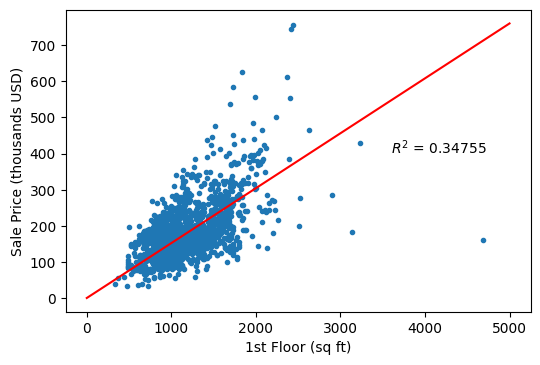

In [ ]:
print (w)

y = w[0] + w[1] * x_train
from sklearn.metrics import r2_score
coeff = r2_score(y_train, y)
print (coeff)

xs = np.linspace(0, 5000, 100000)
ys = (w[0] + w[1] * xs) / 1000

plt.figure(dpi=100)
plt.plot(data['1stFlrSF'], np.divide(data['SalePrice'], 1000), '.')
plt.plot(xs, ys, 'r',)
plt.text(3600, 400, r'$R^2$ = %.5f' % (coeff))
plt.xlabel('1st Floor (sq ft)')
plt.ylabel('Sale Price (thousands USD)')
plt.savefig('house_price_gradient.png')